In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import joblib

In [2]:
# ================== 2. Load Dataset =================
df = pd.read_csv('/content/ai_job_dataset.csv')
print("✅ Data Loaded Successfully")
df
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print(df.shape)

✅ Data Loaded Successfully
    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India 

In [6]:
# ================== 3. Preprocessing =================

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Step 1: Remove duplicates
df.drop_duplicates(inplace=True)

# Step 2: Clean column names
df.columns = df.columns.str.strip()

# Step 3: Rename target column for consistency (optional but recommended)
df.rename(columns={'salary_usd': 'salary_in_usd'}, inplace=True)

# Step 4: Drop rows where salary is missing
df.dropna(subset=['salary_in_usd'], inplace=True)

# Step 5: Fill missing values in categorical columns with mode
for col in df.select_dtypes(include='object').columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Step 6: Label Encode selected categorical columns
categorical_cols = ['job_title', 'company_location', 'employee_residence',
                    'experience_level', 'employment_type', 'company_size']
label_encoders = {}

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:
        raise KeyError(f"Expected column '{col}' not found in dataset.")

# Step 7: Define features and target
features = ['job_title', 'company_location', 'employee_residence', 'experience_level',
            'employment_type', 'company_size', 'remote_ratio']
if not all(col in df.columns for col in features):
    missing = [col for col in features if col not in df.columns]
    raise KeyError(f"Missing required feature columns: {missing}")

X = df[features]
y = df['salary_in_usd']

# Step 8: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Preprocessing complete. Data is ready for modeling.")


✅ Preprocessing complete. Data is ready for modeling.


/tmp/ipython-input-8-904377207.py:9: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


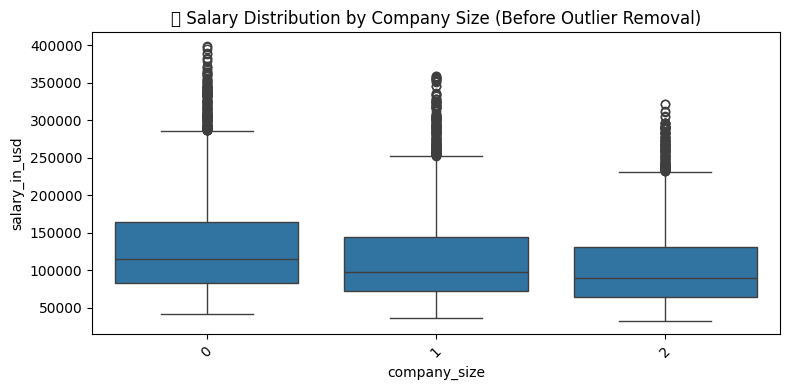

/tmp/ipython-input-8-904377207.py:16: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


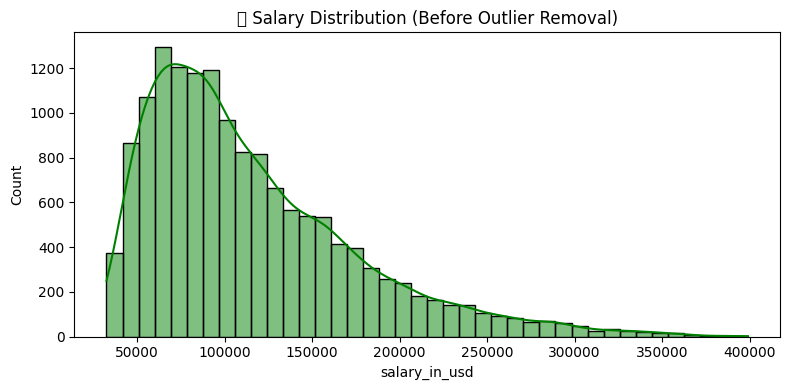

/tmp/ipython-input-8-904377207.py:33: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


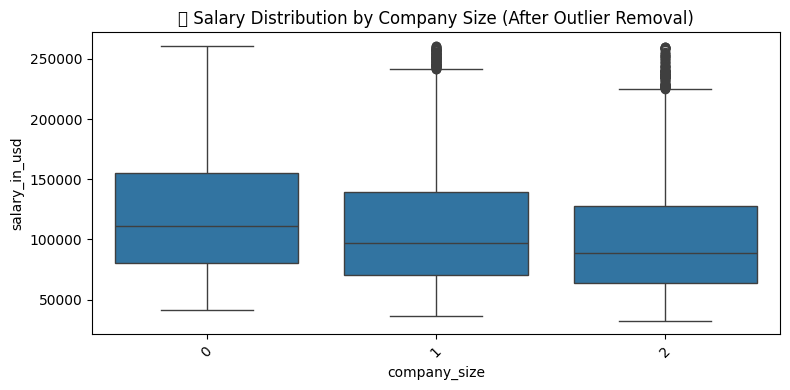

/tmp/ipython-input-8-904377207.py:40: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


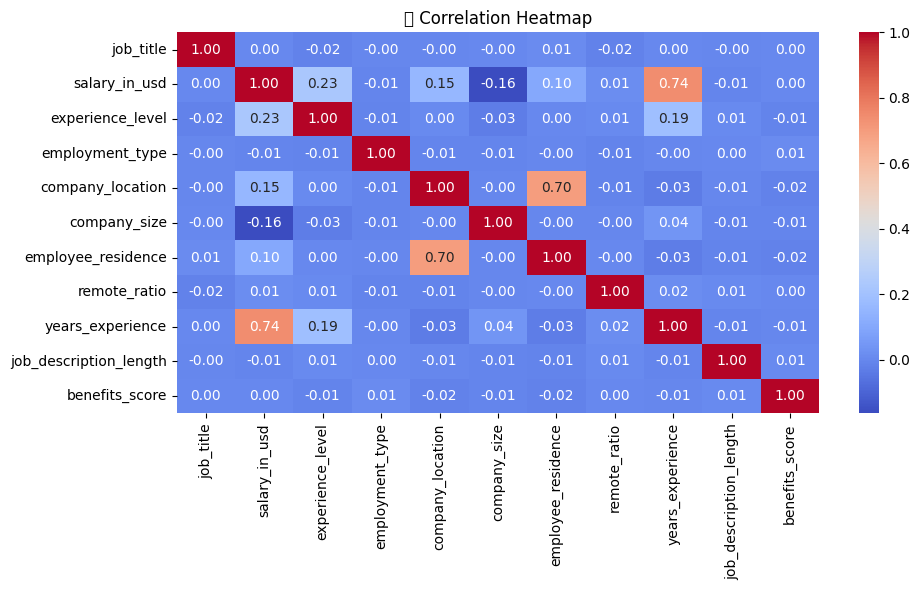

/tmp/ipython-input-8-904377207.py:47: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-8-904377207.py:47: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


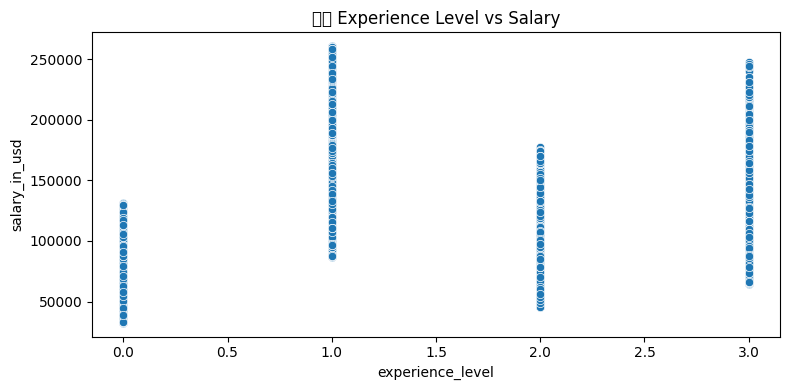

/tmp/ipython-input-8-904377207.py:54: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


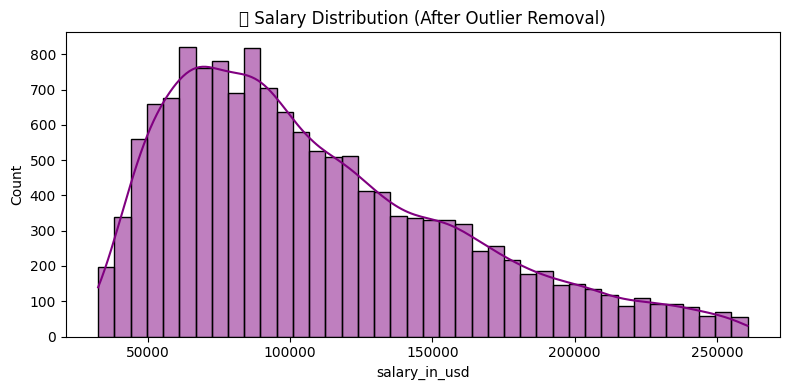

/tmp/ipython-input-8-904377207.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='experience_level', y='salary_in_usd', data=df_eda, ci=None, estimator=np.mean, palette='viridis')
/tmp/ipython-input-8-904377207.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='experience_level', y='salary_in_usd', data=df_eda, ci=None, estimator=np.mean, palette='viridis')
/tmp/ipython-input-8-904377207.py:61: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


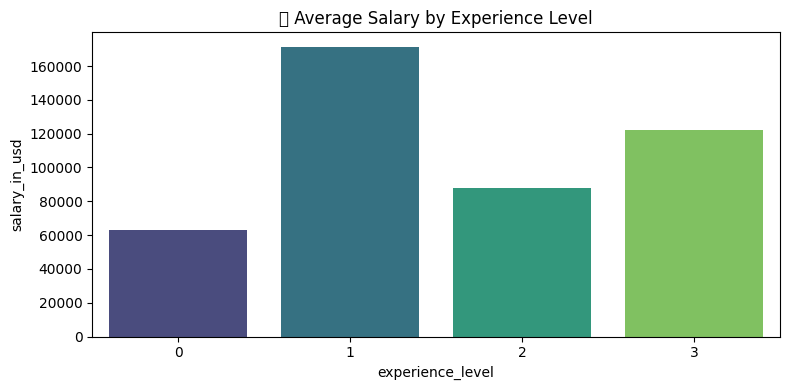

/tmp/ipython-input-8-904377207.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='job_title', data=df_eda[df_eda['job_title'].isin(top_titles)],
/tmp/ipython-input-8-904377207.py:70: UserWarning: Glyph 128084 (\N{NECKTIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128084 (\N{NECKTIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


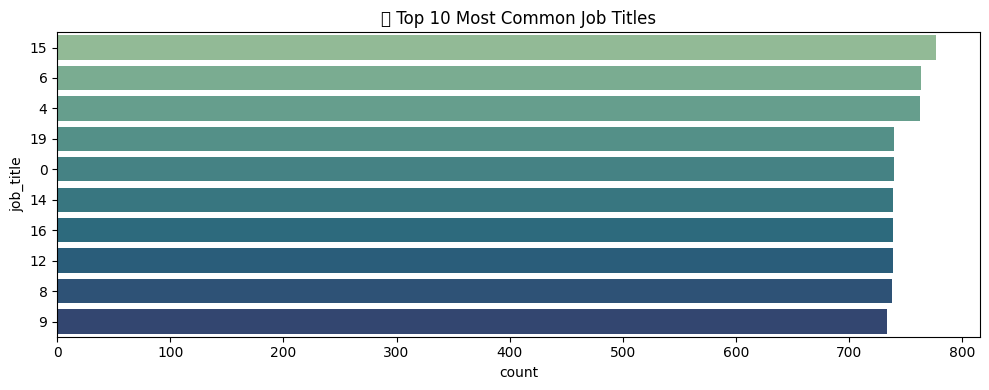

In [8]:
# Copying original for before-after comparison
df_eda = df.copy()

# --- Boxplot before outlier removal ---
plt.figure(figsize=(8, 4))
sns.boxplot(x='company_size', y='salary_in_usd', data=df_eda)
plt.title("🔍 Salary Distribution by Company Size (Before Outlier Removal)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Histogram before outlier removal ---
plt.figure(figsize=(8, 4))
sns.histplot(df_eda['salary_in_usd'], kde=True, bins=40, color='green')
plt.title("💰 Salary Distribution (Before Outlier Removal)")
plt.tight_layout()
plt.show()

# --- Outlier Removal using IQR ---
Q1 = df_eda['salary_in_usd'].quantile(0.25)
Q3 = df_eda['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_eda = df_eda[(df_eda['salary_in_usd'] >= lower_bound) & (df_eda['salary_in_usd'] <= upper_bound)]

# --- Boxplot after outlier removal ---
plt.figure(figsize=(8, 4))
sns.boxplot(x='company_size', y='salary_in_usd', data=df_eda)
plt.title("✅ Salary Distribution by Company Size (After Outlier Removal)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(10, 6))
sns.heatmap(df_eda.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("📊 Correlation Heatmap")
plt.tight_layout()
plt.show()

# --- Scatter Plot: Experience vs Salary ---
plt.figure(figsize=(8, 4))
sns.scatterplot(x='experience_level', y='salary_in_usd', data=df_eda)
plt.title("👨‍💼 Experience Level vs Salary")
plt.tight_layout()
plt.show()

# --- Salary Distribution (after outlier removal) ---
plt.figure(figsize=(8, 4))
sns.histplot(df_eda['salary_in_usd'], kde=True, bins=40, color='purple')
plt.title("💰 Salary Distribution (After Outlier Removal)")
plt.tight_layout()
plt.show()

# --- Bar Plot: Avg salary by Experience Level ---
plt.figure(figsize=(8, 4))
sns.barplot(x='experience_level', y='salary_in_usd', data=df_eda, ci=None, estimator=np.mean, palette='viridis')
plt.title("📈 Average Salary by Experience Level")
plt.tight_layout()
plt.show()

# --- Count Plot: Top 10 Job Titles ---
plt.figure(figsize=(10, 4))
top_titles = df_eda['job_title'].value_counts().nlargest(10).index
sns.countplot(y='job_title', data=df_eda[df_eda['job_title'].isin(top_titles)],
              order=top_titles, palette='crest')
plt.title("👔 Top 10 Most Common Job Titles")
plt.tight_layout()
plt.show()


In [9]:
# ================== 5. Model Training ===============
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
# ================== 6. Evaluation ===================
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ R² Score: {r2:.2f}")
print(f"✅ RMSE: {rmse:.2f}")

✅ R² Score: 0.88
✅ RMSE: 20519.87


In [11]:
# ================== 7. Save Model & Scaler ==========
joblib.dump(model, '/content/xgb_salary_model.pkl')
joblib.dump(scaler, '/content/scaler.pkl')
joblib.dump(label_encoders, '/content/label_encoders.pkl')
print("✅ Model, Scaler, and Encoders saved successfully.")

✅ Model, Scaler, and Encoders saved successfully.
